# Breast Cancer Prediction Project

## 1. First We Import The Necessary Python Libraries.

In [1]:
import numpy as np  # for working and manipulating arrays
import pandas as pd # used for viewing your data in a dataframe
import seaborn as sns # used for visualizing your data 
import matplotlib.pyplot as plt # used for visualizzing your data .
%matplotlib inline

## 2. We Read our dataset using the Pandas Library

In [2]:
data = pd.read_csv('data.csv')
data.head() # his line of code will display the first 10 rows of the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 31,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,M


In [3]:
data.shape  # this line of code returns the number of rows and columns in the dataset

(569, 33)

## 3. The Data Preparation and Data Cleaning Phase

### The first step here is to check for missing values 

In [4]:
data.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 31                569
diagnosi

*** 
One good thing about the dataset is that it is almost comppletely filled except for the "Unnamed: 32" column which has 100%
missinig values. 
1. we are going to drop that column because it is not going to be useful to our model for the prediction. this is because the column has 0ver 50% missiing values.
2. we will also drop the "id" column because it just a unique i dentifier that the hospital gived to its patients and the "id" does not determine whether a person will have any of the two types of cancer

Note: we are already making use of Feature Engineeriing here to be able to select features that ill help our model get better accuracy from this dataset, hence we need to have domain knowledge
***

In [5]:
data = data.drop(['id', 'Unnamed: 31'], axis = 1)

In [6]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## 3. Now We Move To The Data Visualization Phase

### The is where we will be making use of the seaborn and matpplotlib libraries to check the relationships between the features in  the dataset. 

[]

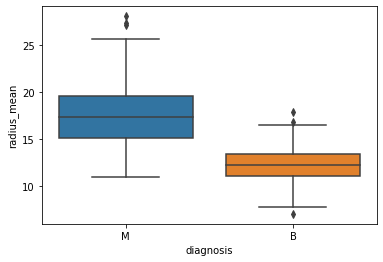

In [7]:
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = data)
plt.plot()

***
we see here that the patients with a radius_mean within 15-20 were diagnosed iht breaast cancer while patients lower radius_mean were diagnosed with benign breast cancer
***

[]

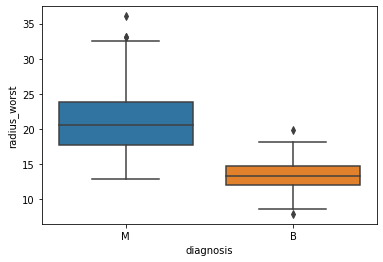

In [8]:
sns.boxplot(x = 'diagnosis', y = 'radius_worst', data = data)
plt.plot()

***
we see here that patients with higher 'radius_worst' were diagnosed with melignant breast cancer while patients with lower 'radius_worst' are diagnosed with benign breast cancer
***

[]

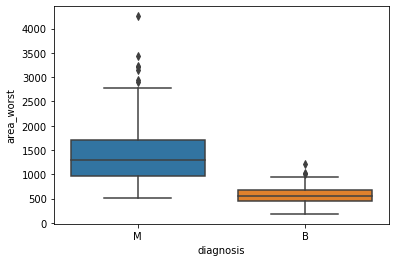

In [9]:
sns.boxplot(x = 'diagnosis', y = 'area_worst', data = data)
plt.plot()

***
we see here that patients with higher 'area_worst' were diagnosed with melignant breast cancer while patients with lower 'area_worst' are diagnosed with benign breast cancer
***

### we will also use Pearson's Correlation to check the correlation between features iin our dataset.

***
Using Pearson Correlation, we are doing a plot for the correlation between the features in our dataset and it is going to show
us as a heatmap and this is acheived using the seaborn library we imported earlier.

Basically if two features are highly correlated with more than 80% (0.8) correlation, we can drop one of the two feature
if they are both independent features, but if they are highly correlated with the dependent variable ('diagnosis' or the Y feature) we won't remove it because it will be veery helpful in our prediction.
***

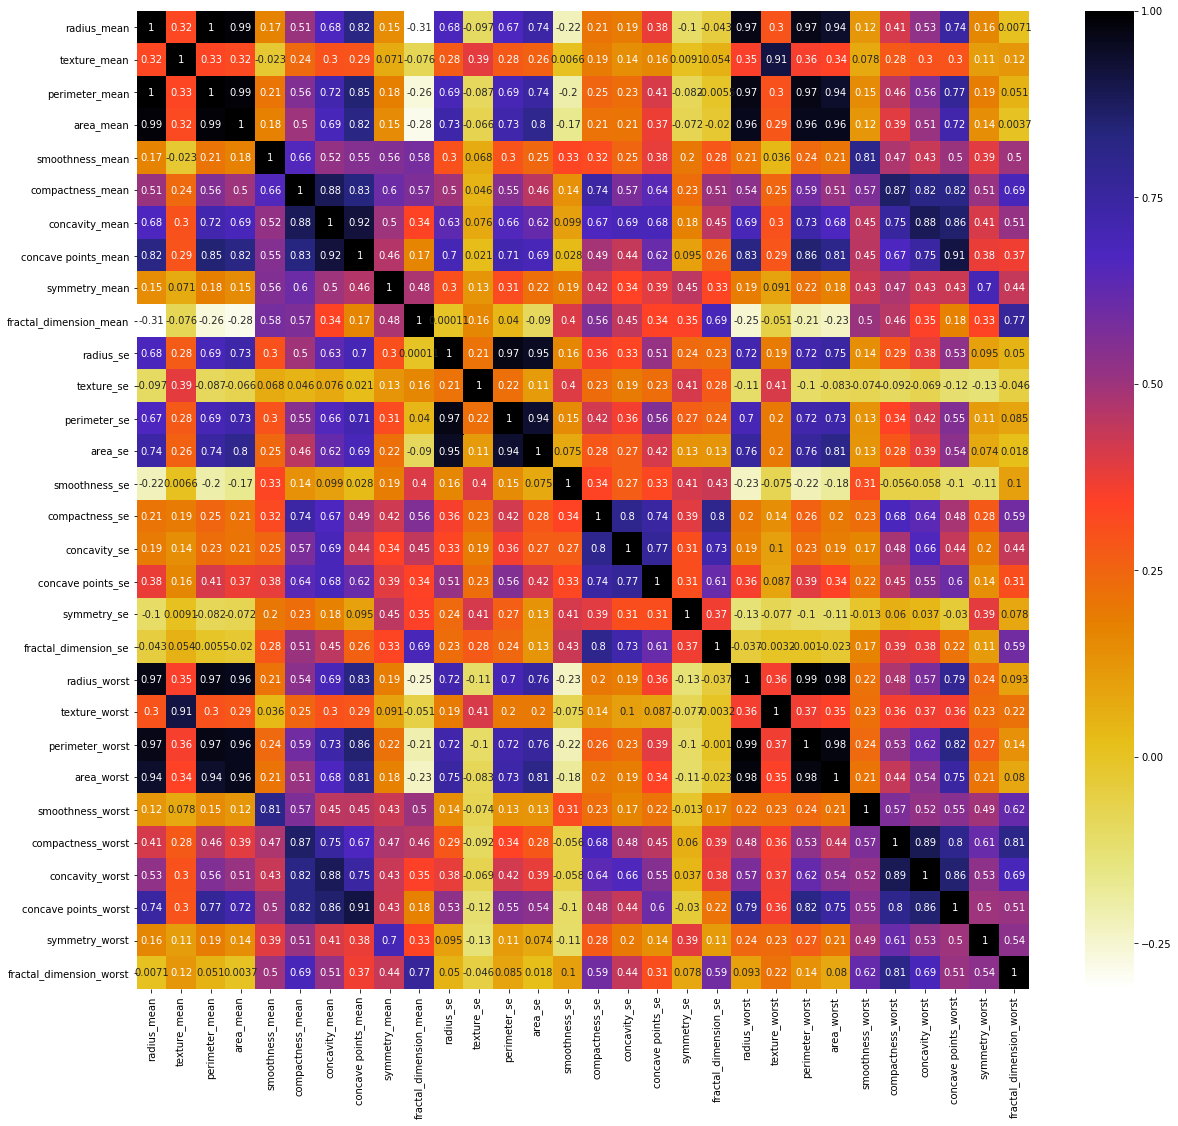

In [10]:
plt.figure(figsize=(20,18))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### as we can see, some features are highly correlated, we will need to use feature engineering to select the most important features that can help our model in the prediction.

In [11]:
#with the following function we can select highly correlated values
#it will will remove the first that is correlated with anyother feature

def correlation(dataset, threshold):
    col_corr = set()                                     #set of all correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:   #we are interested in the absolute coeff value too
                colname = corr_matrix.columns[i]         #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features =correlation(data, 0.)
len(set(corr_features))

10

In [13]:
corr_features #this is the list of all the features that are correlated over 80%

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

***
The next step is tho check for which of them are correlated together on the heatmap and use feature engineering to drop one of them.we will drop only 'radius_mean', this is because it is also highly corelated with mosst of the features that are correlatted above 80%. we will drop them when splitting our data into x and y.
***

## 4. The next step is to split our data into features/independent variables(x) and target/dependent variable(y)

In [14]:
x = data.drop(['diagnosis', 'radius_mean','radius_worst', 'area_worst','concave points_mean','concave points_worst',
 'perimeter_mean','perimeter_se', 'perimeter_worst','texture_worst'], axis = 1)
y = data['diagnosis'] #, 'radius_worst', 'area_worst', 'area_mean'

In [15]:
x

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,153.40,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,74.08,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,94.03,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,27.23,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,94.44,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,158.70,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,99.04,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,48.55,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,86.22,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


## 5. The next step is to split our data into training and testing set

In [16]:
# first we import the pthon library for splitting

from sklearn.model_selection import train_test_split

In [17]:
#We will split our dataset (Features (X) and Label (Y)) into training and test data by 
#using train_test_split() function from the sklearn. 
#The training set will be 90% while the test set will be 10%, that is why test_size=0.1. 
#the random_state ensure that the split that you generate are reproducible and the random numbers are generated in the same order 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify = y, random_state=1234)

In [18]:
#Let's train a Logistic regression model with our training data. 
#We need to import the Logistic regression from the sklearn model.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
#We now create an object of class LogisticRegression() to train the model on

LR = LogisticRegression()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()

In [20]:
#Now we sre fitting our training set, this is where the main training process of our model takes place, after which, it is ready
#to make prerdiction

LR.fit(x_train, y_train)

RFC.fit(x_train, y_train)

GBC.fit(x_train, y_train)

C:\Users\YASHIM GABRIEL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier()

In [21]:
#The model is now ready to make prediction for the unknown label by using only the features from the test data (X_test).


LR_prediction = LR.predict(x_test)

RFC_prediction = RFC.predict(x_test)

GBC_prediction = GBC.predict(x_test)



# And now, for the unknown label by using only the features from the train data (X_train).

LR_x_train_prediction = LR.predict(x_train)

RFC_x_train_prediction = RFC.predict(x_train)

GBC_x_train_prediction = GBC.predict(x_train)



LR_prediction

RFC_prediction

GBC_prediction

# the line of code will output an array of the prediction, i.e. 'Y' for customers that will go for the loan
# and 'N' for customers that will not go for the loan

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [22]:
# This is the line of code we will use to check for the accuracy of the prediction made by our model

from sklearn.metrics import accuracy_score 
from sklearn import metrics

In [23]:
accuracy_LR= metrics.accuracy_score(y_test, LR_prediction)

accuracy_RFC= metrics.accuracy_score(y_test, RFC_prediction)

accuracy_GBC= metrics.accuracy_score(y_test, GBC_prediction)

In [24]:
# Now to print our training set and testing set accuracy:

print('Test accuracy for LR: ',accuracy_LR, '\n')

print('Train accuracy for LR: ',accuracy_score(y_train,LR_x_train_prediction), '\n'*2)


print('Test accuracy for RFC: ',accuracy_RFC, '\n')

print('Train accuracy for RFC: ',accuracy_score(y_train,RFC_x_train_prediction), '\n'*2)


print('Test accuracy for GBC: ',accuracy_GBC, '\n')

print('Train accuracy for GBC: ',accuracy_score(y_train,GBC_x_train_prediction))


Test accuracy for LR:  0.9122807017543859 

Train accuracy for LR:  0.945054945054945 


Test accuracy for RFC:  0.9210526315789473 

Train accuracy for RFC:  1.0 


Test accuracy for GBC:  0.9385964912280702 

Train accuracy for GBC:  1.0


***
I tried using LogisticRegression and RandomForestClassifier but they were less accurate, GradientBoostingClassifier gave the highest accuracy for both training and testing data.
***